### 1. Data Cleaning and Processing on the original Dataset

In [ ]:
#Importing the relevant libraries
import os
import os.path

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from google.colab import files
from google.colab import drive
#drive.mount('/content/drive')

In [ ]:
uploaded = files.upload()

Saving WPA_DataCase_2024.csv to WPA_DataCase_2024.csv


In [ ]:
import pandas as pd
df = pd.read_csv(next(iter(uploaded)))
df.head()

DEMO_Org DEMO_meeting_remote   DEMO_Dept  OBSV_PreC_Location_A_primryoffice  \
0    Org 2                 NaN  Accounting                                0.8   
1    Org 2                 NaN  Accounting                                0.6   
2    Org 2                 NaN  Accounting                                0.6   
3    Org 2                 NaN  Accounting                                0.5   
4    Org 3                  No  Accounting                                NaN   

   OBSV_PreC_Location_B_officeother  OBSV_PreC_Location_C_client  \
0                               NaN                          NaN   
1                               NaN                          NaN   
2                               NaN                          NaN   
3                               NaN                          NaN   
4                               NaN                          NaN   

   OBSV_PreC_Location_D_WFH  OBSV_PreC_Location_E_publicspace  \
0                       0.2                               NaN   
1                       0.4                               NaN   
2                       0.4                               NaN   
3                       0.5                               NaN   
4                       NaN                               NaN   

   OBSV_PreC_Location_F_transit  OBSV_PreC_Location_G_other  ...  \
0                           NaN                         NaN  ...   
1                           NaN                         NaN  ...   
2                           NaN                         NaN  ...   
3                           NaN                         NaN  ...   
4                           NaN                         NaN  ...   

   DECSN_factors_C_WrkLifeSep  DECSN_factors_D_safety  \
0                         4.0                     2.5   
1                         5.0                     2.5   
2                         NaN                     NaN   
3                         4.0                     2.5   
4                         4.0                     NaN   

   OBSV_Now_WrkTimeA_Indiv_fract_vCollab  \
0                                  0.600   
1                                  0.700   
2                                  0.750   
3                                  0.700   
4                                  0.875   

   OBSV_PreC_meetingsize0ffice_D_10plus  \
0                                   NaN   
1                                   NaN   
2                                   NaN   
3                                   NaN   
4                                   NaN   

               PREF_space_B_inperson_collab     PREF_space_C_videoconf  \
0  Enclosed room (meeting room, phone room)                        NaN   
1                               Workstation                        NaN   
2  Enclosed room (meeting room, phone room)                        NaN   
3  Enclosed room (meeting room, phone room)                        NaN   
4                 Elsewhere in the building  Elsewhere in the building   

      PREF_space_D_impromptu      PREF_space_E_recharge  \
0                        NaN                        NaN   
1                        NaN                        NaN   
2                        NaN                        NaN   
3                        NaN                        NaN   
4  Elsewhere in the building  Elsewhere in the building   

   PREF_space_F_accessible  PREF_space_G_firstarrive  
0                      NaN                       NaN  
1                      NaN                       NaN  
2                      NaN                       NaN  
3                      NaN                       NaN  
4           Desk or office            Desk or office  

[5 rows x 185 columns]

In [ ]:
df.describe()

OBSV_PreC_Location_A_primryoffice  OBSV_PreC_Location_B_officeother  \
count                         348.000000                        130.000000   
mean                            0.661310                          0.069346   
std                             0.314214                          0.156640   
min                             0.000000                          0.000000   
25%                             0.400000                          0.000000   
50%                             0.745000                          0.000000   
75%                             1.000000                          0.050000   
max                             1.000000                          0.900000   

       OBSV_PreC_Location_C_client  OBSV_PreC_Location_D_WFH  \
count                    98.000000                255.000000   
mean                      0.188837                  0.345922   
std                       0.251655                  0.273602   
min                       0.000000                  0.000000   
25%                       0.000250                  0.100000   
50%                       0.100000                  0.400000   
75%                       0.250000                  0.500000   
max                       1.000000                  1.000000   

       OBSV_PreC_Location_E_publicspace  OBSV_PreC_Location_F_transit  \
count                         67.000000                     88.000000   
mean                           0.026716                      0.087091   
std                            0.045938                      0.124213   
min                            0.000000                      0.000000   
25%                            0.000000                      0.000000   
50%                            0.000000                      0.050000   
75%                            0.050000                      0.100000   
max                            0.200000                      0.800000   

       OBSV_PreC_Location_G_other  OBSV_Now_Interact_Work_within_org  \
count                   80.000000                         240.000000   
mean                     0.133487                           0.528500   
std                      0.199152                           0.334573   
min                      0.000000                           0.000000   
25%                      0.000000                           0.200000   
50%                      0.050000                           0.500000   
75%                      0.200000                           0.800000   
max                      0.950000                           1.000000   

       OBSV_PreC_meeting_A_inperson  OBSV_PreC_meeting_B_hyrbid  ...  \
count                    691.000000                  672.000000  ...   
mean                       0.492740                    0.382021  ...   
std                        0.307883                    0.286653  ...   
min                        0.000000                    0.000000  ...   
25%                        0.200000                    0.150000  ...   
50%                        0.500000                    0.300000  ...   
75%                        0.750000                    0.600000  ...   
max                        1.000000                    1.000000  ...   

       PostC_impact_shift_H_social  PostC_impact_shift_I_managersconnect  \
count                  1136.000000                           1056.000000   
mean                      4.010123                              2.989110   
std                       1.151759                              1.253289   
min                       0.000000                              0.000000   
25%                       4.000000                              2.500000   
50%                       4.000000                              2.500000   
75%                       5.000000                              4.000000   
max                       5.000000                              5.000000   

       PostC_impact_shift_J_client  PostC_impact_shift_K_enjoy  \
count               

In [ ]:
#Displaying the full dataframe
pd.set_option('display.max_columns', 2000)
pd.set_option('display.max_rows', 2000)
df_null = df.isnull().sum()
total_rows = len(df)
null_info = pd.DataFrame({'Null Count': df_null, 'Total Rows': total_rows, '% Null': (df_null / total_rows) * 100})
#null_info

"A **Likert scale** is a rating scale used to measure opinions, attitudes, or behaviors. It consists of a statement or a question, followed by a series of five or seven answer statements. Respondents choose the option that best corresponds with how they feel about the statement or question." There were a lot of columns that captured the data in that manner. We identified those columns and converted them to a 1-5 scale for easy calculation of the output.

In [ ]:
#capture 3 likert columns sets
target_words1 = ['important', 'unimportant','Very important','Very unimportant']
target_words2 = ['satisfied', 'very satisfied','very dissatisfied','dissatisfied']
target_words3 = ['strongly agree', 'agree','disagree','strongly disagree']
likert1 = []
likert2 = []
likert3 = []
for col in df.columns:
    if any(df[col].astype(str).str.contains('|'.join(target_words1), case=False, na=False)):
        likert1.append(col)
likertset1 = set(likert1)

for col in df.columns:
    if any(df[col].astype(str).str.contains('|'.join(target_words2), case=False, na=False)):
        likert2.append(col)
likertset2 = set(likert2)

for col in df.columns:
    if any(df[col].astype(str).str.contains('|'.join(target_words3), case=False, na=False)):
        likert3.append(col)
likertset3 = set(likert3)
likertset3

In [ ]:
#CONVERT LIKERT STRING TO NUMERIC so that we can the preference of the employees can be captured well.
likert_scale_1 = {'Very important':'5', 'Important':'4','Neutral':'3', 'Unimportant':'2', 'Very unimportant':'1'}#, 'NA':'0'}
likert_scale_2 = {'Very satisfied':'5', 'Satisfied':'4','Neutral':'3', 'Dissatisfied':'2', 'Unsatisfied':'2', 'Very dissatisfied':'1', 'Very unsatisfied':'1'}#, 'NA':'0'}
likert_scale_3 = {'Strongly agree':'5', 'Agree':'4','Neutral':'3', 'Disagree':'2', 'Strongly disagree':'1'}

for col in likertset1 :
  df[col] = df[col].replace(likert_scale_1)
for col in likertset2 :
  df[col] = df[col].replace(likert_scale_2)
for col in likertset3 :
  df[col] = df[col].replace(likert_scale_3)

In [ ]:
#convert workrate
df['PREF_WFK_rate_home'] = df['PREF_WFK_rate_home']*5
df['PREF_WFK_rate_home'].head(10)

0    NaN
1    NaN
2    NaN
3    NaN
4    5.0
5    2.0
6    NaN
7    NaN
8    3.0
9    0.5
Name: PREF_WFK_rate_home, dtype: float64

The **Percentage columns** contain the split of a percentage number from 0-1 between the options. (OBSV_PreC_meeting_A_inperson, hybrid, remote). The data is present as (NA, 1, NA) , (0.3, 0.7, NA) and so on in these groups. This means that not every NA in this column indicates an unanswered question, it means that the value should instead be replaced with a numerical zero.

In [ ]:
#percentage change to replace NA with zero
percent_columns = ['OBSV_PreC_interative_A_inperson',
'OBSV_PreC_interative_B_remote',
'OBSV_PreC_meetingsize0ffice_A_1',
'OBSV_PreC_meetingsize0ffice_B_2n3',
'OBSV_PreC_meetingsize0ffice_C_4n9',
'OBSV_PreC_meetingsize0ffice_D_10plus',
'OBSV_PreC_meeting_A_inperson',
'OBSV_PreC_meeting_B_hyrbid',
'OBSV_PreC_meeting_C_remote',
'OBSV_same_space_count_A_1',
'OBSV_same_space_count_B_2n3',
'OBSV_same_space_count_C_4n9',
'OBSV_same_space_count_D_10p',
'OBSV_PreC_Location_A_primryoffice',
'OBSV_PreC_Location_B_officeother',
'OBSV_PreC_Location_C_client',
'OBSV_PreC_Location_D_WFH',
'OBSV_PreC_Location_E_publicspace',
'OBSV_PreC_Location_F_transit',
'OBSV_PreC_Location_G_other',
'OBSV_PreC_wiOffice_A_desk',
'OBSV_PreC_wiOffice_B_otherdeck',
'OBSV_PreC_wiOffice_C_meetingrm',
'OBSV_PreC_wiOffice_D_lobby',
'OBSV_PreC_wiOffice_E_speicaltyarea',
'OBSV_PreC_wiOffice_F_other',
'OBSV_Now_Interact_Work_within_org',
'OBSV_Now_WrkTimeA_Indiv_fract_vCollab',
'OBSV_PreC_interative_A_inperson',
'OBSV_PreC_interative_B_remote',
'OBSV_PreC_meetingsize0ffice_A_1',
'OBSV_PreC_meetingsize0ffice_B_2n3',
'OBSV_PreC_meetingsize0ffice_C_4n9',
'OBSV_PreC_meetingsize0ffice_D_10plus',
'OBSV_PreC_meeting_A_inperson',
'OBSV_PreC_meeting_B_hyrbid',
'OBSV_PreC_meeting_C_remote',
'OBSV_same_space_count_A_1',
'OBSV_same_space_count_B_2n3',
'OBSV_same_space_count_C_4n9',
'OBSV_same_space_count_D_10p',
'OBSV_PreC_Location_A_primryoffice',
'OBSV_PreC_Location_B_officeother',
'OBSV_PreC_Location_C_client',
'OBSV_PreC_Location_D_WFH',
'OBSV_PreC_Location_E_publicspace',
'OBSV_PreC_Location_F_transit',
'OBSV_PreC_Location_G_other',
'OBSV_PreC_wiOffice_A_desk',
'OBSV_PreC_wiOffice_B_otherdeck',
'OBSV_PreC_wiOffice_C_meetingrm',
'OBSV_PreC_wiOffice_D_lobby',
'OBSV_PreC_wiOffice_E_speicaltyarea',
'OBSV_PreC_wiOffice_F_other',
'OBSV_Now_Interact_Work_within_org',
'OBSV_Now_WrkTimeA_Indiv_fract_vCollab']

for col in percent_columns :
  df[col] = df[col].fillna(0)

There are two columns containing **Yes/No**. We converted them to a binary 1/0 variable

In [ ]:
for col in ['DEMO_Tenure_PreC_employee','DEMO_meeting_remote']:
  for i in range(len(df)):
    if df[col].iloc[i] == "Yes":
      df[col].iloc[i] = 1
    elif df[col].iloc[i] == "No":
      df[col].iloc[i] = 0

Next, after processing the whole data we divided it into the different organisations

In [ ]:
df1 = df[df['DEMO_Org'] == 'Org 1']
df2 = df[df['DEMO_Org'] == 'Org 2']
df3 = df[df['DEMO_Org'] == 'Org 3']
df4 = df[df['DEMO_Org'] == 'Org 4']
df5 = df[df['DEMO_Org'] == 'Org 5']
df1.head()

DEMO_Org DEMO_meeting_remote         DEMO_Dept  \
196    Org 1                   0  Customer Support   
197    Org 1                   0  Customer Support   
198    Org 1                   0  Customer Support   
199    Org 1                   0  Customer Support   
200    Org 1                   1  Customer Support   

     OBSV_PreC_Location_A_primryoffice  OBSV_PreC_Location_B_officeother  \
196                               1.00                              0.00   
197                               0.92                              0.02   
198                               1.00                              0.00   
199                               1.00                              0.00   
200                               1.00                              0.00   

     OBSV_PreC_Location_C_client  OBSV_PreC_Location_D_WFH  \
196                         0.00                      0.00   
197                         0.02                      0.02   
198                         0.00                      0.00   
199                         0.00                      0.00   
200                         0.00                      0.00   

     OBSV_PreC_Location_E_publicspace  OBSV_PreC_Location_F_transit  \
196                               0.0                          0.00   
197                               0.0                          0.02   
198                               0.0                          0.00   
199                               0.0                          0.00   
200                               0.0                          0.00   

     OBSV_PreC_Location_G_other  OBSV_Now_Interact_Work_within_org  \
196                         0.0                                0.0   
197                         0.0                                0.0   
198                         0.0                                0.0   
199                         0.0                                0.0   
200                         0.0                                0.0   

     OBSV_PreC_meeting_A_inperson  OBSV_PreC_meeting_B_hyrbid  \
196                          1.00                        0.00   
197                          0.05                        0.95   
198                          1.00                        0.00   
199                          0.85                        0.05   
200                          0.80                        0.20   

     OBSV_PreC_meeting_C_remote  OBSV_PreC_interative_A_inperson  \
196                        0.00                              0.0   
197                        0.00                              0.0   
198                        0.00                              0.0   
199                        0.05                              0.0   
200                        0.00                              0.0   

     OBSV_PreC_interative_B_remote  OBSV_same_space_count_A_1  \
196                            0.0                        0.0   
197                            0.0                        0.0   
198                            0.0                        0.0   
199                            0.0                        0.0   
200                            0.0                        0.0   

     OBSV_same_space_count_B_2n3  OBSV_same_space_count_C_4n9  \
196                          0.0                          0.0   
197                          0.0                          0.0   
198                          0.0                          0.0   
199                          0.0                          0.0   
200                          0.0                          0.0   

     OBSV_same_space_count_D_10p  OBSV_PreC_meetingsize0ffice_A_1  \
196                          0.0                             0.00   
197                          0.0                             0.15   
198                          0.0                             0.95   
199                          0.0                             0.10   
200                          0.0                             1.00   

    

We wrote this output into an excel file, divided by organisation.

In [ ]:
with pd.ExcelWriter('/content/output_file.xlsx') as writer:
    df.to_excel(writer, sheet_name='All Orgs', index=False, na_rep='NaN')
    df1.to_excel(writer, sheet_name='Org 1', index=False, na_rep='NaN')
    df2.to_excel(writer, sheet_name='Org 2', index=False, na_rep='NaN')
    df3.to_excel(writer, sheet_name='Org 3', index=False, na_rep='NaN' )
    df4.to_excel(writer, sheet_name='Org 4', index=False, na_rep='NaN')
    df5.to_excel(writer, sheet_name='Org 5', index=False, na_rep='NaN')

from google.colab import files
files.download('/content/output_file.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### 2. Processing for different organisations

In [ ]:
#upload file
import os
import os.path

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from google.colab import files
from google.colab import drive

uploaded = files.upload()


Saving output_file.xlsx to output_file (1).xlsx


### For each organisation -
<ul>
<li> Remove columns containing null values for 90-100% of the rows
<li> Drop any rows that have >85% nulls across columns
<li> For rows containing less than 20% null values across columns, impute with mean of the column
<li> For the remaining nulls, impute by average of job function or mode of that column (string variables)
</ul>

E.g. Organisation 3

In [ ]:
#import your page from excel as dataframe
import pandas as pd
org_3 = pd.read_excel(next(iter(uploaded)), sheet_name = "Org 3")
org_3.head()

DEMO_Org  DEMO_meeting_remote   DEMO_Dept  \
0    Org 3                    0  Accounting   
1    Org 3                    0  Accounting   
2    Org 3                    0  Accounting   
3    Org 3                    1  Accounting   
4    Org 3                    0  Accounting   

   OBSV_PreC_Location_A_primryoffice  OBSV_PreC_Location_B_officeother  \
0                                  0                                 0   
1                                  0                                 0   
2                                  0                                 0   
3                                  0                                 0   
4                                  0                                 0   

   OBSV_PreC_Location_C_client  OBSV_PreC_Location_D_WFH  \
0                            0                         0   
1                            0                         0   
2                            0                         0   
3                            0                         0   
4                            0                         0   

   OBSV_PreC_Location_E_publicspace  OBSV_PreC_Location_F_transit  \
0                                 0                             0   
1                                 0                             0   
2                                 0                             0   
3                                 0                             0   
4                                 0                             0   

   OBSV_PreC_Location_G_other  OBSV_Now_Interact_Work_within_org  \
0                           0                                  0   
1                           0                                  0   
2                           0                                  0   
3                           0                                  0   
4                           0                                  0   

   OBSV_PreC_meeting_A_inperson  OBSV_PreC_meeting_B_hyrbid  \
0                           0.0                         0.3   
1                           0.6                         0.3   
2                           0.2                         0.8   
3                           0.7                         0.2   
4                           0.5                         0.5   

   OBSV_PreC_meeting_C_remote  OBSV_PreC_interative_A_inperson  \
0                         0.0                                0   
1                         0.1                                0   
2                         0.0                                0   
3                         0.1                                0   
4                         0.0                                0   

   OBSV_PreC_interative_B_remote  OBSV_same_space_count_A_1  \
0                              0                          0   
1                              0                          0   
2                              0                          0   
3                              0                          0   
4                              0                          0   

   OBSV_same_space_count_B_2n3  OBSV_same_space_count_C_4n9  \
0                            0                            0   
1                            0                            0   
2                            0                            0   
3                            0                            0   
4                            0                            0   

   OBSV_same_space_count_D_10p  OBSV_PreC_meetingsize0ffice_A_1  \
0                            0                              1.0   
1                            0                              0.2   
2                            0                              0.2   
3                            0                              0.5   
4                            0                              0.0   

   OBSV_PreC_meetingsize0ffice_B_2n3  OBSV_PreC_meetingsize0ffice_C_4n9  \
0                                0.0                               0.00   
1 

In [ ]:
#Drop all null cols
df_null = org_3.isnull().sum()
r = len(org_3)
null_info = pd.DataFrame({'Null Count': df_null, 'Total Rows': r, '% Null': (df_null / r) * 100})
nullcols = null_info[null_info['% Null'] >= 90.0]
df_col_dropped =  org_3.drop(columns=nullcols.index.tolist())

In [ ]:
#Create list of columns to be treated differently
likert_cols = ['SATSF_CollabSpace_A_Tech',
 'SATSF_CollabSpace_B_software',
 'SATSF_CollabSpace_C_CollabTools',
 'SATSF_CollabSpace_D_furniture',
 'SATSF_CollabSpace_E_seating',
 'SATSF_CollabSpace_F_naturallight',
 'SATSF_CollabSpace_G_acoustics',
 'SATSF_HomeOffice_A_Tech',
 'SATSF_HomeOffice_B_software',
 'SATSF_HomeOffice_C_CollabTools',
 'SATSF_HomeOffice_D_furniture',
 'SATSF_HomeOffice_E_seating',
 'SATSF_HomeOffice_F_naturallight',
 'SATSF_HomeOffice_G_acoustics',
 'SATSF_facilitate_HomeTech_3A_virtualcollab',
 'SATSF_facilitate_HomeTech_3B_inpersoncollab',
 'SATSF_facilitate_HomeTech_3C_virtualcollab',
 'SATSF_facilitate_Home_1A_focus',
 'SATSF_facilitate_Home_1B_inpersoncollab',
 'SATSF_facilitate_Home_1C_virtualcollab',
 'SATSF_facilitate_OfficeTech_4A_virtualcollab',
 'SATSF_facilitate_OfficeTech_4B_inpersoncollab',
 'SATSF_facilitate_OfficeTech_4C_virtualcollab',
 'SATSF_facilitate_Office_2A_focus',
 'SATSF_facilitate_Office_2B_inpersoncollab',
 'SATSF_facilitate_Office_2C_virtualcollab',
 'SATSF_office_A_community',
 'SATSF_office_B_designexcellence',
 'SATSF_office_C_pride',
 'SATSF_office_D_expressme',
 'SATSF_office_E_control',
 'SATSF_office_F_wellbeing',
 'SATSF_office_G_myfamily',
 'SATSF_office_H_customers',
 'SATSF_office_I_orgcullture',
 'SATSF_office_J_knowledgeshare',
 'SATSF_office_K_planet', 'PREF_CollabSpace_A_tech',
 'PREF_CollabSpace_B_software',
 'PREF_CollabSpace_C_CollabTools',
 'PREF_CollabSpace_D_furniture',
 'PREF_CollabSpace_E_seating',
 'PREF_CollabSpace_F_naturallight',
 'PREF_CollabSpace_G_acoustics',
 'PREF_features_A_chair',
 'PREF_features_B_proximitry',
 'PREF_features_C_concentration',
 'PREF_features_D_privacy',
 'PREF_features_E_noise',
 'PREF_features_F_daylight',
 'PREF_features_G_light',
 'PREF_features_H_nature',
 'PREF_features_I_Sychro',
 'PREF_features_J_collabspace',
 'PREF_features_K_temp',
 'PREF_features_L_clean',
 'PREF_features_M_lockers',
 'PREF_features_N_events',
 'PREF_features_O_food',
 'PREF_features_Q_kitchen',
 'PREF_features_R_gym',
 'PREF_features_S_relax',
 'PREF_features_T_greenspace',
 'WP_Featr_office_A_community',
 'WP_Featr_office_B_designexcellence',
 'WP_Featr_office_C_pride',
 'WP_Featr_office_D_expressme',
 'WP_Featr_office_E_control',
 'WP_Featr_office_F_wellbeing',
 'WP_Featr_office_G_myfamily',
 'WP_Featr_office_H_customers',
 'WP_Featr_office_I_oegculture',
 'WP_Featr_office_J_knowledgeshare',
 'WP_Featr_office_K_planet', 'Etc1_WLB_improved',
 'Etc2_chooseWFH',
 'Etc3_no_workstation',
 'Etc4_justlaptop',
 'Etc5_teamclose',
 'Etc6_connected',
 'Etc7_priorities',
 'Etc8_WFK_efffective','DEMO_Tenure_PreC_employee','DEMO_meeting_remote']

In [ ]:
#Check for columns with only zero values
zero_columns = df_col_dropped.columns[df_col_dropped.eq(0).all()]
print(zero_columns)

Index(['OBSV_PreC_Location_A_primryoffice', 'OBSV_PreC_Location_B_officeother',
       'OBSV_PreC_Location_C_client', 'OBSV_PreC_Location_D_WFH',
       'OBSV_PreC_Location_E_publicspace', 'OBSV_PreC_Location_F_transit',
       'OBSV_PreC_Location_G_other', 'OBSV_Now_Interact_Work_within_org',
       'OBSV_PreC_interative_A_inperson', 'OBSV_PreC_interative_B_remote',
       'OBSV_same_space_count_A_1', 'OBSV_same_space_count_B_2n3',
       'OBSV_same_space_count_C_4n9', 'OBSV_same_space_count_D_10p'],
      dtype='object')


In [ ]:
#Drop the columns with only zero if you want to
df_col_dropped =  df_col_dropped.drop(columns=zero_columns)
df_col_dropped.shape

(385, 163)

In [ ]:
#Please check if there are any rows with null% >= 85%. If there is drop that row(S) using its index (code for dropping not included)
df_null_rows = df_col_dropped.isnull().sum(axis=1)
c = len(df_col_dropped.columns)
null_info_rows = pd.DataFrame({'Null Count': df_null_rows, 'Total Columns': c, '% Null': (df_null_rows / c) * 100})
null_info_rows.head()

Null Count  Total Columns    % Null
0           0            163  0.000000
1          11            163  6.748466
2           3            163  1.840491
3           0            163  0.000000
4           0            163  0.000000

In [ ]:
#Check for columns with NA% <= 20%
df_null = df_col_dropped.isnull().sum()
r = len(df_col_dropped)
null_info = pd.DataFrame({'Null Count': df_null, 'Total Rows': r, '% Null': (df_null / r) * 100})
null_under_20 = null_info[(null_info['% Null'] <= 20.0) & (null_info['% Null'] > 0)]
null_under_20

In [ ]:
#Fill columns with NA% <= 20% (fills mean for numeric, fills mode for string)
for col in null_under_20.index:

    if col in likert_cols:
        df_col_dropped[col].fillna(round(average_value), inplace=True)

    if pd.api.types.is_numeric_dtype(df_col_dropped[col]):
        average_value = df_col_dropped[col].mean()
        df_col_dropped[col].fillna(average_value, inplace=True)

    elif pd.api.types.is_string_dtype(df_col_dropped[col]):
        most_occuring_category = df_col_dropped[col].mode().iloc[0]
        df_col_dropped[col].fillna(most_occuring_category, inplace=True)

In [ ]:
#Check for any null%'s still less than 20% (should show no values if the above code worked)
df_null = df_col_dropped.isnull().sum()
r = len(df_col_dropped)
null_info = pd.DataFrame({'Null Count': df_null, 'Total Rows': r, '% Null': (df_null / r) * 100})
null_under_20 = null_info[(null_info['% Null'] <= 20.0) & (null_info['% Null'] > 0)]
null_under_20

Empty DataFrame
Columns: [Null Count, Total Rows, % Null]
Index: []

In [ ]:
df_col_dropped

DEMO_Org  DEMO_meeting_remote                                   DEMO_Dept  \
0      Org 3                    0                                  Accounting   
1      Org 3                    0                                  Accounting   
2      Org 3                    0                                  Accounting   
3      Org 3                    1                                  Accounting   
4      Org 3                    0                                  Accounting   
5      Org 3                    1                                  Accounting   
6      Org 3                    0                                  Accounting   
7      Org 3                    0                                  Accounting   
8      Org 3                    0                                  Accounting   
9      Org 3                    0                                  Accounting   
10     Org 3                    0                                  Accounting   
11     Org 3                    0                                  Accounting   
12     Org 3                    0                                  Accounting   
13     Org 3                    1                        Architect / Designer   
14     Org 3                    0                        Architect / Designer   
15     Org 3                    0                        Architect / Designer   
16     Org 3                    1                        Architect / Designer   
17     Org 3                    1                        Architect / Designer   
18     Org 3                    1                        Architect / Designer   
19     Org 3                    1                        Architect / Designer   
20     Org 3                    1                        Architect / Designer   
21     Org 3                    0                        Architect / Designer   
22     Org 3                    0                        Architect / Designer   
23     Org 3                    0                        Architect / Designer   
24     Org 3                    1                        Architect / Designer   
25     Org 3                    0                        Architect / Designer   
26     Org 3                    0                        Architect / Designer   
27     Org 3                    1                        Architect / Designer   
28     Org 3                    0                        Architect / Designer   
29     Org 3                    1                        Architect / Designer   
30     Org 3                    0                        Architect / Designer   
31     Org 3                    1                        Architect / Designer   
32     Org 3                    1                        Architect / Designer   
33     Org 3                    1                        Architect / Designer   
34     Org 3                    0                        Architect / Designer   
35     Org 3                    1                        Architect / Designer   
36     Org 3                    1                        Architect / Designer   
37     Org 3                    0                        Architect / Designer   
38     Org 3                    1                        Architect / Designer   
39     Org 3                    0                        Architect / Designer   
40     Org 3                    1                        Architect / Designer   
41     Org 3                    0                        Architect / Designer   
42     Org 3                    1                        Architect / Designer   
43     Org 3                    0                        Architect / Designer   
44     Org 3                    0                        Architect / Designer   
45     Org 3                    1                        Architect / Designer   
46     Org 3                    0                        Architect / Designer   
47     Org 3                    0                        Architect / Designer   
48     Org 3                    1  

In [ ]:
#imputing by job function
for col in columns_list:
    if col in likert_cols:
        # Calculate the average value for each job function
        average_values_by_dept = df_col_dropped.groupby('DEMO_Dept')[col].mean()
        # Fill missing values based on job function with randomness
        df_col_dropped[col] = df_col_dropped.apply(
            lambda row: row[col] if pd.notna(row[col]) else np.random.normal(loc=average_values_by_dept[row['DEMO_Dept']], scale=0.15),
            axis=1
        )

    elif pd.api.types.is_numeric_dtype(df_col_dropped[col]):
        # Calculate the average value for each job function
        average_values_by_dept = df_col_dropped.groupby('DEMO_Dept')[col].mean()
        # Fill missing values based on job function with randomness
        df_col_dropped[col] = df_col_dropped.apply(
            lambda row: row[col] if pd.notna(row[col]) else np.random.normal(loc=average_values_by_dept[row['DEMO_Dept']], scale=0.15),
            axis=1
        )

    elif pd.api.types.is_string_dtype(df_col_dropped[col]):
        # Calculate the mode for each job function
        mode_values_by_dept = df_col_dropped.groupby('DEMO_Dept')[col].apply(lambda x: x.mode().iloc[0] if not x.mode().empty else None)
        # Fill missing values based on job function
        df_col_dropped[col] = df_col_dropped.apply(
            lambda row: row[col] if pd.notna(row[col]) else mode_values_by_dept[row['DEMO_Dept']],
            axis=1
        )

## 3. Data Visualizations and Analysis for a single organisation (Org 3)


Text(0.5, 1.0, 'Five Largest Departments in Org 3')

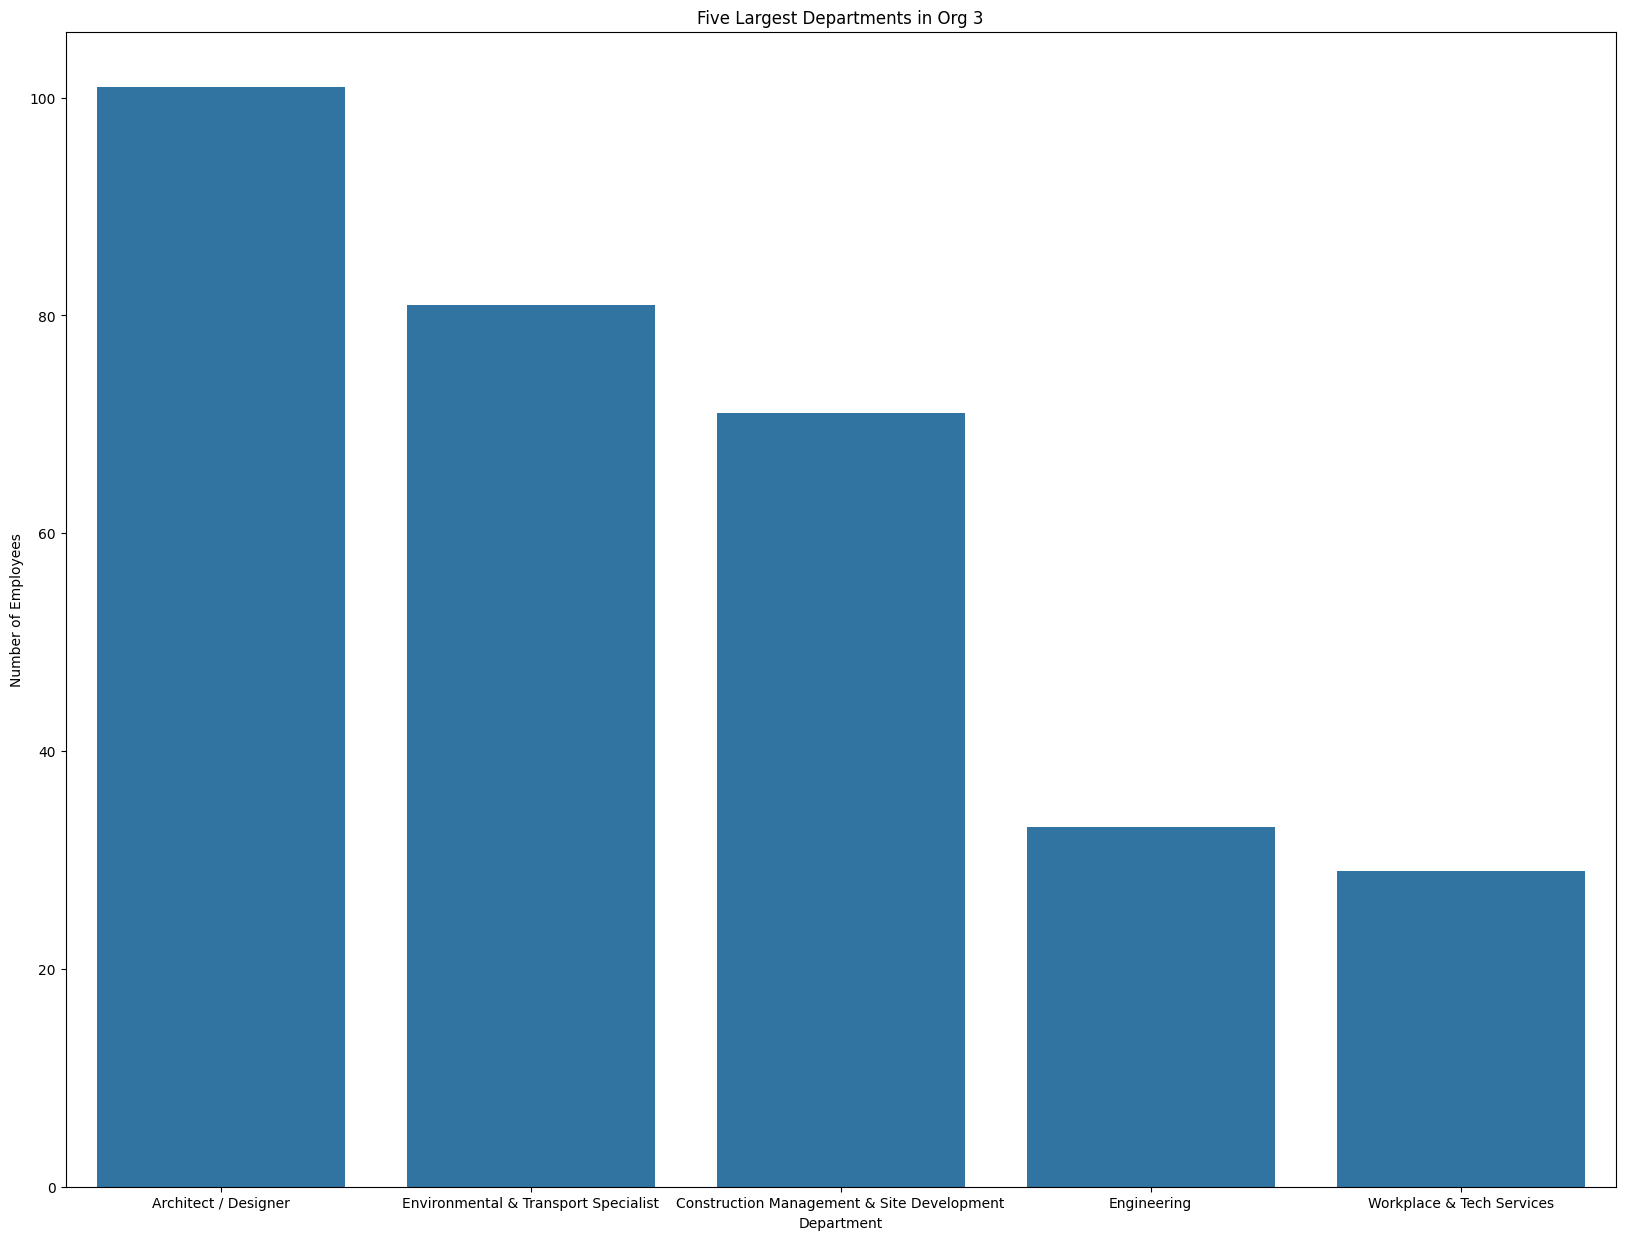

In [ ]:
#5 largest departments
employees_counts = org_3['DEMO_Dept'].value_counts()
employees_counts

plt.figure(figsize=(20,15))
sns.barplot(employees_counts[0:5])
plt.xlabel('Department')
plt.ylabel('Number of Employees')
plt.title('Five Largest Departments in Org 3')

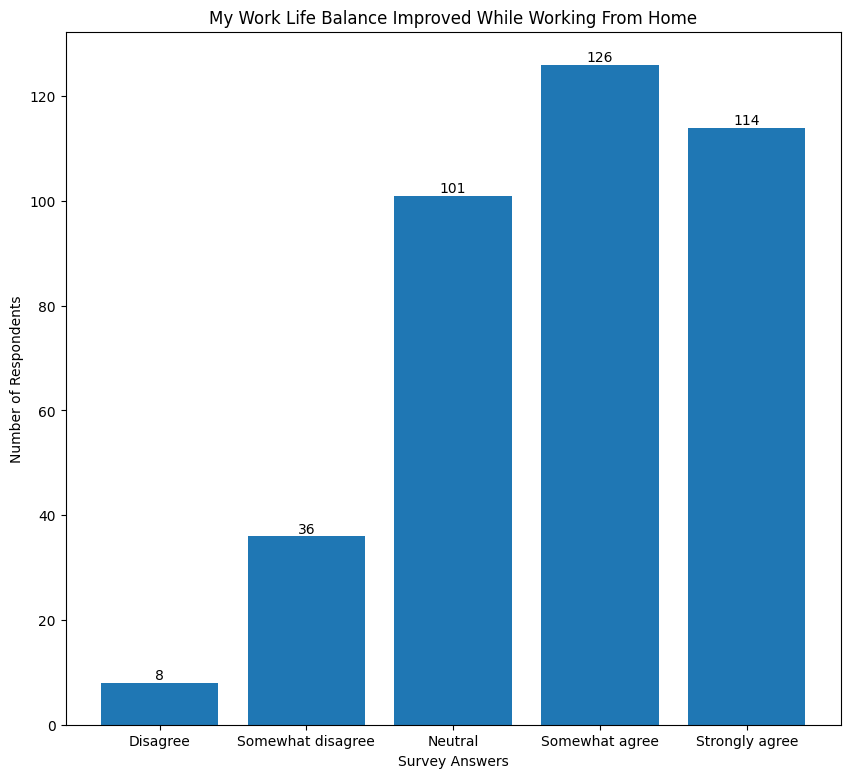

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,9))
# Sample data
categories = [1, 2, 3, 4, 5]
values = [8, 36, 101, 126, 114]

# Plotting the data with specified labels
plt.bar(categories, values, tick_label=[
    'Disagree', 'Somewhat disagree', 'Neutral', 'Somewhat agree', 'Strongly agree'])

# Adding labels and title
plt.xlabel('Survey Answers')
plt.ylabel('Number of Respondents')
plt.title('My Work Life Balance Improved While Working From Home')

#Add an annotation for each bar
for i in range(len(categories)):
    plt.text(categories[i], values[i], str(values[i]), ha='center', va='bottom')

# Displaying the plot
plt.show()


Text(0.5, 1.0, 'How Important are Collaboration Tools for a Productive Collaborative Space?')

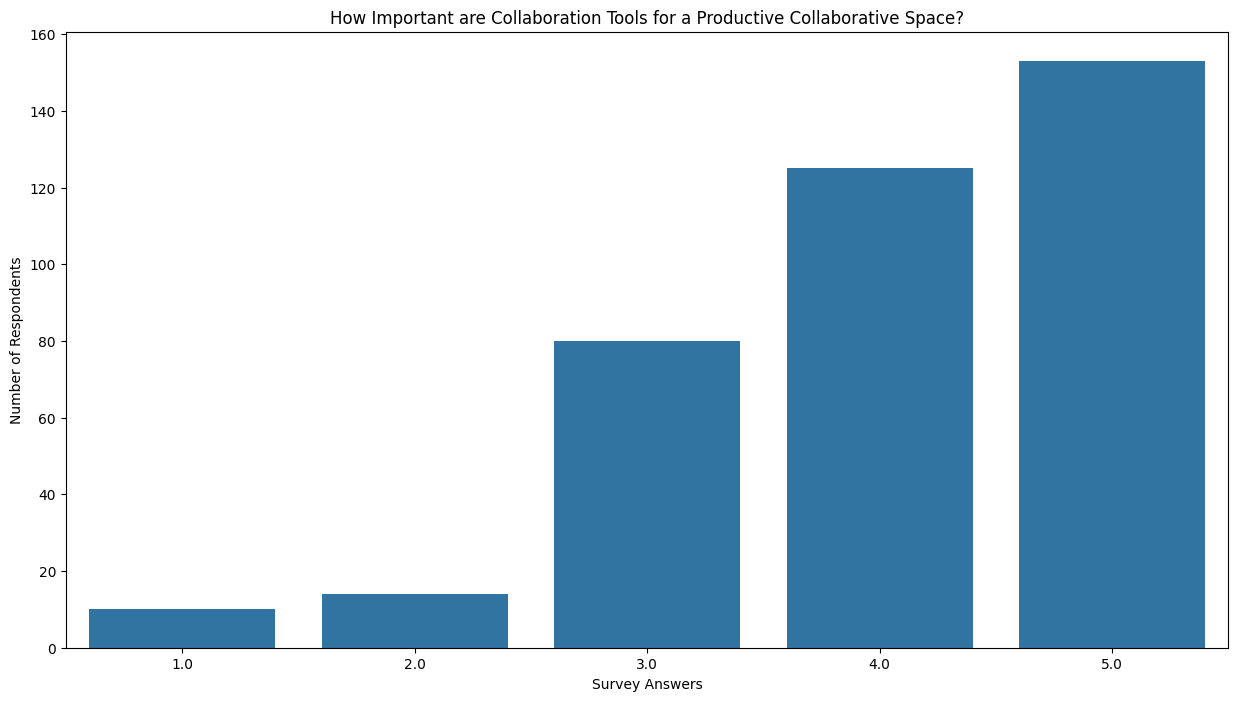

In [ ]:
collab_tools = org_3['PREF_CollabSpace_C_CollabTools'].value_counts()
collab_tools

plt.figure(figsize=(15,8))
sns.barplot(collab_tools)
plt.xlabel('Survey Answers')
plt.ylabel('Number of Respondents')
plt.title('How Important are Collaboration Tools for a Productive Collaborative Space?')

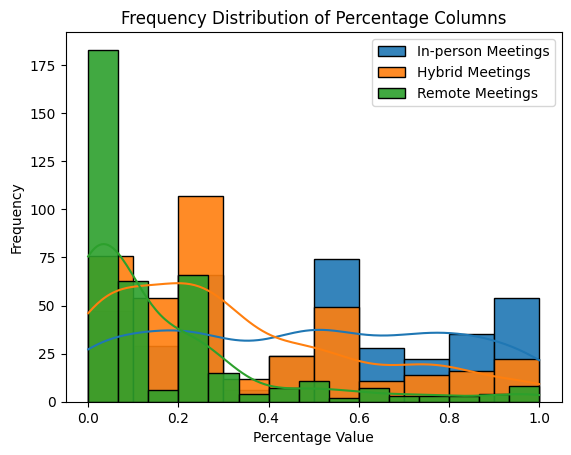

In [ ]:
percentage_columns = ['OBSV_PreC_meeting_A_inperson', 'OBSV_PreC_meeting_B_hyrbid', 'OBSV_PreC_meeting_C_remote']
custom_names = ['In-person Meetings', 'Hybrid Meetings', 'Remote Meetings']  # Custom names for the legend

for column, name in zip(percentage_columns, custom_names):
    sns.histplot(org_3[column], kde=True, label=name, alpha=0.9)

plt.title('Frequency Distribution of Percentage Columns')
plt.xlabel('Percentage Value')
plt.ylabel('Frequency')
plt.legend()
plt.show()

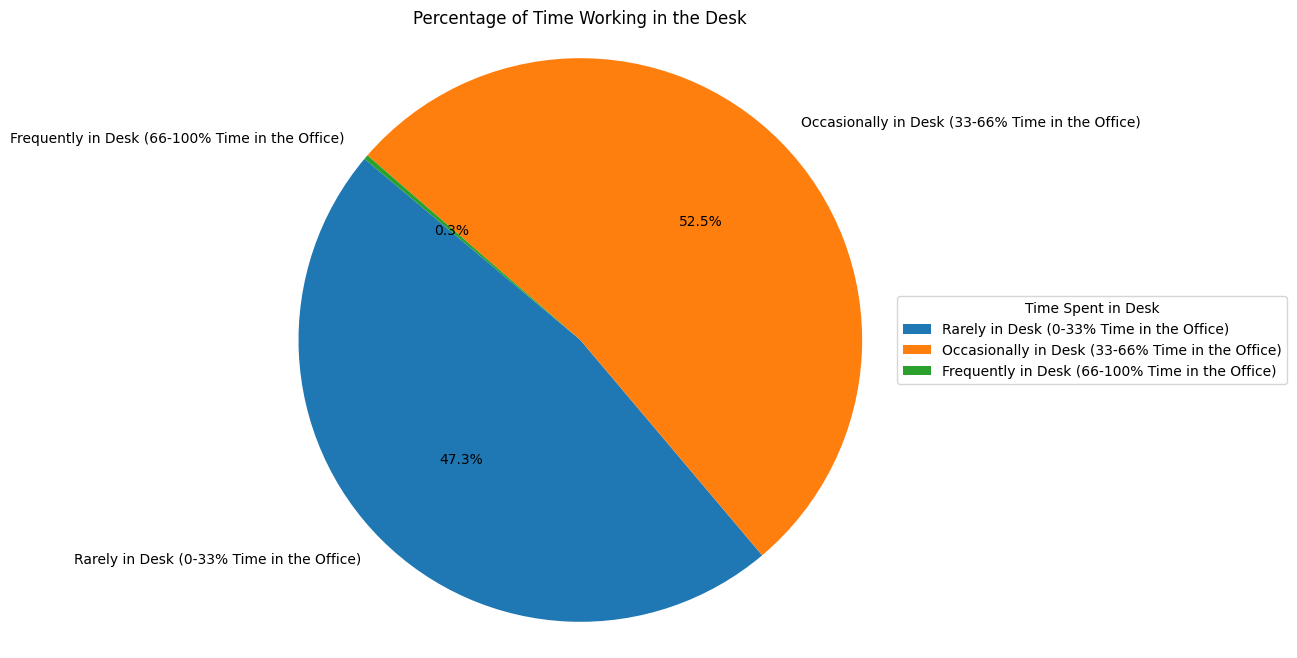

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Given array
data = np.array(org_3['OBSV_PreC_wiOffice_A_desk'])
ranges = [(0.0, 0.3), (0.3, 0.6), (0.6, 1.),]

# Initialize counts for each group
counts = [0] * len(ranges)

# Count occurrences of values falling into each range
for value in data:
    for i, (start, end) in enumerate(ranges):
        if start <= value <= end:
            counts[i] += 1
            break

# Define more descriptive labels for each group
descriptive_labels = [
    'Rarely in Desk (0-33% Time in the Office)',
    'Occasionally in Desk (33-66% Time in the Office)',
    'Frequently in Desk (66-100% Time in the Office)'
]

# Plot the pie chart with the new labels
plt.figure(figsize=(8, 8))
plt.pie(counts, labels=descriptive_labels, autopct='%1.1f%%', startangle=140)
plt.legend(title="Time Spent in Desk", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.title('Percentage of Time Working in the Desk')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


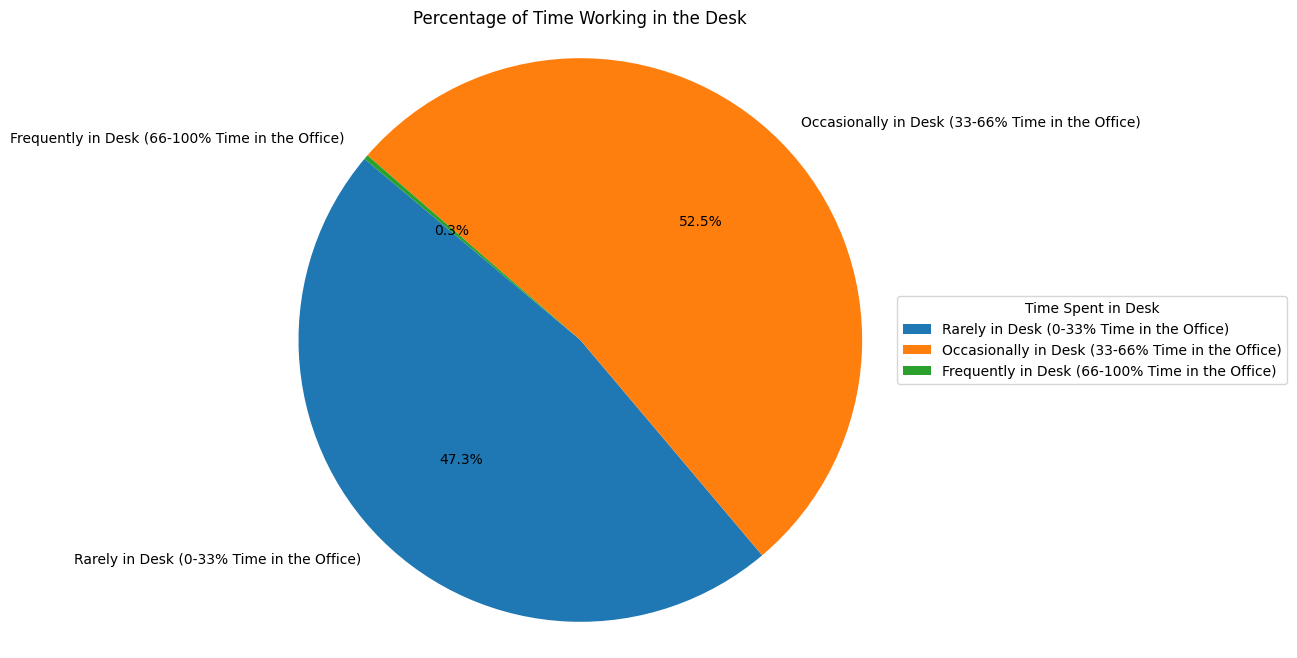

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Given array
data = np.array(org_3['OBSV_PreC_wiOffice_A_desk'])
ranges = [(0.0, 0.3), (0.3, 0.6), (0.6, 1.),]

# Initialize counts for each group
counts = [0] * len(ranges)

# Count occurrences of values falling into each range
for value in data:
    for i, (start, end) in enumerate(ranges):
        if start <= value <= end:
            counts[i] += 1
            break

# Define more descriptive labels for each group
descriptive_labels = [
    'Rarely in Desk (0-33% Time in the Office)',
    'Occasionally in Desk (33-66% Time in the Office)',
    'Frequently in Desk (66-100% Time in the Office)'
]

# Plot the pie chart with the new labels
plt.figure(figsize=(8, 8))
plt.pie(counts, labels=descriptive_labels, autopct='%1.1f%%', startangle=140)
plt.legend(title="Time Spent in Desk", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.title('Percentage of Time Working in the Desk')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


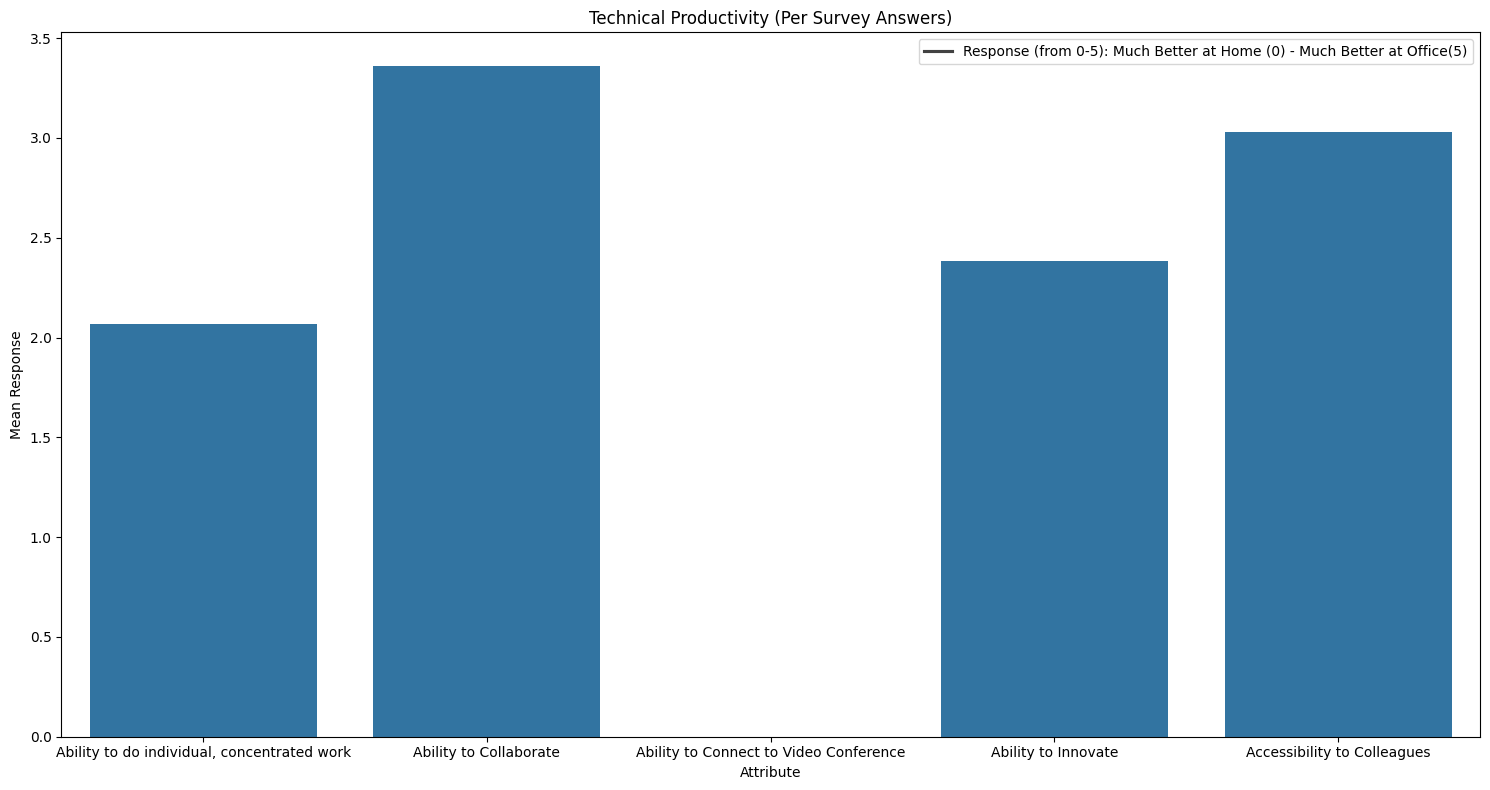

In [ ]:
pro_1 = org_3['PostC_impact_shift_B_productive'].mean()
pro_2 = org_3['PostC_impact_shift_C_collab'].mean()
pro_3 = org_3['PostC_impact_shift_D_videoconf'].mean()
pro_4 = org_3['PostC_impact_shift_E_innovate'].mean()
pro_5 = org_3['PostC_impact_shift_F_colleagueaccess'].mean()

Pro_dict = {
    'Ability to do individual, concentrated work': pro_1,
    'Ability to Collaborate': pro_2,
    'Ability to Connect to Video Conference': pro_3,
    'Ability to Innovate': pro_4,
    'Accessibility to Colleagues': pro_5,
}

Pro_stats_df = pd.DataFrame(list(Pro_dict.items()), columns=['Attribute', 'Mean'])

plt.figure(figsize=(15, 8))
sns.barplot(x='Attribute', y='Mean', data=Pro_stats_df)

descriptive_labels = [
    'Ability to do individual, concentrated work',
    'Ability to Collaborate',
    'Ability to Connect to Video Conference',
    'Ability to Innovate',
    'Accessibility to Colleagues'
]
plt.xticks(ticks=range(len(descriptive_labels)), labels=descriptive_labels)

plt.title('Technical Productivity (Per Survey Answers)')
plt.xlabel('Attribute')
plt.ylabel('Mean Response')

plt.legend(labels=['Response (from 0-5): Much Better at Home (0) - Much Better at Office(5)'])

plt.tight_layout()
plt.show()

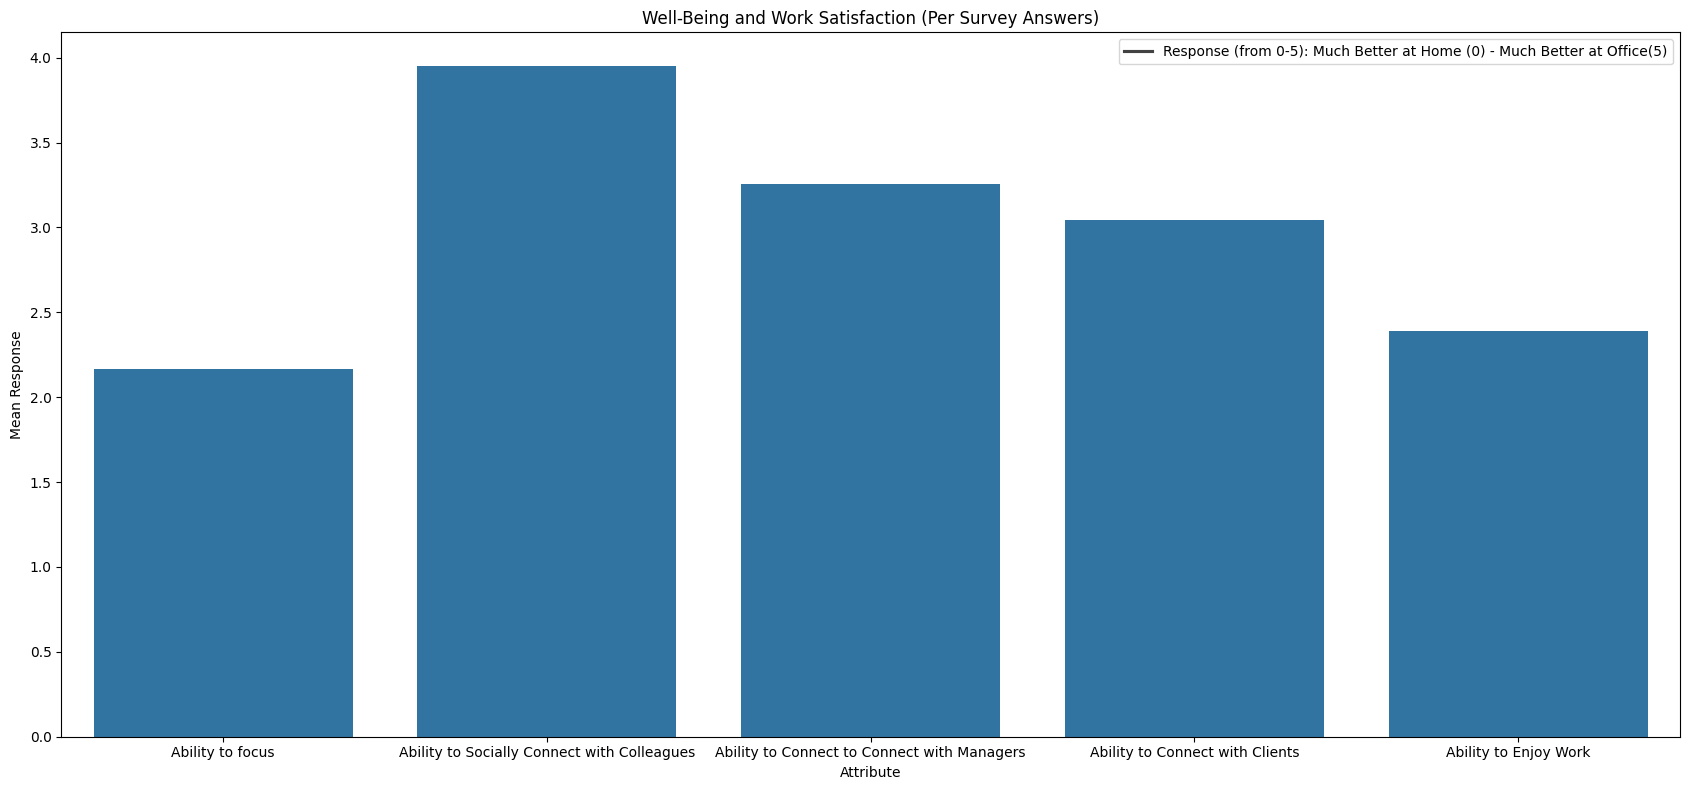

In [ ]:
# Productivity per Motivation, Focus, and Well-being

pro_1 = org_3['PostC_impact_shift_A_focus'].mean()
pro_2 = org_3['PostC_impact_shift_H_social'].mean()
pro_3 = org_3['PostC_impact_shift_I_managersconnect'].mean()
pro_4 = org_3['PostC_impact_shift_J_client'].mean()
pro_5 = org_3['PostC_impact_shift_K_enjoy'].mean()

Pro_dict = {
    'Ability to focus': pro_1,
    'Ability to Socially Connect with Colleagues': pro_2,
    'Ability to Connect to Connect with Managers': pro_3,
    'Ability to Connect with Clients': pro_4,
    'Ability to Enjoy Work': pro_5,
}

Pro_stats_df = pd.DataFrame(list(Pro_dict.items()), columns=['Attribute', 'Mean'])

plt.figure(figsize=(17, 8))
sns.barplot(x='Attribute', y='Mean', data=Pro_stats_df)

descriptive_labels = [
    'Ability to focus',
    'Ability to Socially Connect with Colleagues',
    'Ability to Connect to Connect with Managers',
    'Ability to Connect with Clients',
    'Ability to Enjoy Work'
]
plt.xticks(ticks=range(len(descriptive_labels)), labels=descriptive_labels)

plt.title('Well-Being and Work Satisfaction (Per Survey Answers)')
plt.xlabel('Attribute')
plt.ylabel('Mean Response')

plt.legend(labels=['Response (from 0-5): Much Better at Home (0) - Much Better at Office(5)'])

plt.tight_layout()
plt.show()

## 4. Measures of Productivity


#### To continue studying productivity and find out what are the potential factors made respondents would prefer at home or at office to produce a greater production of work, enabling us to study the drivers/predictors making respondents to answer in such ways. Even though are not able to find direct factors of increasing productivity, the result of studying such pattern are still somehow sigificant to understand employees producitity.

#### For independent variables we selected {'PREF_features_A_chair':'PREF_features_T_greenspace'} under category: Workplace Features as independent variable because It has the best breakdown of physical feature for employees during work, which are another category (other than mental) of being directly associated with workspace setting

#### For dependent Variables, we only selected {'PostC_impact_shift_A_focus', 'PostC_impact_shift_C_collab', 'PostC_impact_shift_E_innovate' ,'PostC_impact_shift_F_colleagueaccess'} for four reasons as follows: 1) There are no direct measurement nor indexes quantifying "Productivity". 2) They are assoicated with our definition of productivity: employee work freely without feeling distracted or overwhelmed. 3) They the only attributes where at least 5 org has answered and also Fundamentally isolated the preference of employees at home and vs. at office, which can best reduce confounding bias. It is explained as follows:

#### However, due to the the missing data on independent variable, we can only conduct regression model for each org seperatedly based on their available attributes (columns) which interpretation can be assessed by the organization level. On the other hand, we would like to exclude analysis for Org 5 because they only respond with a mean of 1.0 (out of 5.0) on  8 columns which considered extreme to the end result.

#### Technical Productivity

In [ ]:
# Technical Productivity (Org 1)

pro_1 = org_1['PostC_impact_shift_B_productive'].mean()
pro_2 = org_1['PostC_impact_shift_C_collab'].mean()
pro_3 = org_1['PostC_impact_shift_D_videoconf'].mean()
pro_4 = org_1['PostC_impact_shift_E_innovate'].mean()
pro_5 = org_1['PostC_impact_shift_F_colleagueaccess'].mean()

Pro_dict = {
    'Ability to do individual, concentrated work': pro_1,
    'Ability to Collaborate': pro_2,
    'Ability to Connect to Video Conference': pro_3,
    'Ability to Innovate': pro_4,
    'Accessibility to Colleagues': pro_5,
}

Pro_stats_df = pd.DataFrame(list(Pro_dict.items()), columns=['Attribute', 'Mean'])

plt.figure(figsize=(17, 8))
sns.barplot(x='Attribute', y='Mean', data=Pro_stats_df)

descriptive_labels = [
    'Ability to do individual, concentrated work',
    'Ability to Collaborate',
    'Ability to Connect to Video Conference',
    'Ability to Innovate',
    'Accessibility to Colleagues'
]
plt.xticks(ticks=range(len(descriptive_labels)), labels=descriptive_labels)

plt.title('Technical Productivity (Per Survey Answers)')
plt.xlabel('Attribute')
plt.ylabel('Mean Response')

plt.legend(labels=['Response (from 0-5): Much Better at Home (0) - Much Better at Office(5)'])
plt.text(0.8, -0.5, '*Note: Empty columns indicate that the corresponding question has been left unanswered by the respective organizations', fontsize=10, ha='center')

plt.tight_layout()
plt.show()

In [ ]:
# Technical Productivity (Org 2)

pro_1 = org_2['PostC_impact_shift_B_productive'].mean()
pro_2 = org_2['PostC_impact_shift_C_collab'].mean()
pro_3 = org_2['PostC_impact_shift_D_videoconf'].mean()
pro_4 = org_2['PostC_impact_shift_E_innovate'].mean()
pro_5 = org_2['PostC_impact_shift_F_colleagueaccess'].mean()

Pro_dict = {
    'Ability to do individual, concentrated work': pro_1,
    'Ability to Collaborate': pro_2,
    'Ability to Connect to Video Conference': pro_3,
    'Ability to Innovate': pro_4,
    'Accessibility to Colleagues': pro_5,
}

Pro_stats_df = pd.DataFrame(list(Pro_dict.items()), columns=['Attribute', 'Mean'])

plt.figure(figsize=(17, 8))
sns.barplot(x='Attribute', y='Mean', data=Pro_stats_df)

descriptive_labels = [
    'Ability to do individual, concentrated work',
    'Ability to Collaborate',
    'Ability to Connect to Video Conference',
    'Ability to Innovate',
    'Accessibility to Colleagues'
]
plt.xticks(ticks=range(len(descriptive_labels)), labels=descriptive_labels)

plt.title('Technical Productivity (Per Survey Answers)')
plt.xlabel('Attribute')
plt.ylabel('Mean Response')

plt.legend(labels=['Response (from 0-5): Much Better at Home (0) - Much Better at Office(5)'])
plt.text(0.8, -0.5, '*Note: Empty columns indicate that the corresponding question has been left unanswered by the respective organizations', fontsize=10, ha='center')

plt.tight_layout()
plt.show()

In [ ]:
# Technical Productivity (Org 3)

pro_1 = org_3['PostC_impact_shift_B_productive'].mean()
pro_2 = org_3['PostC_impact_shift_C_collab'].mean()
pro_3 = org_3['PostC_impact_shift_D_videoconf'].mean()
pro_4 = org_3['PostC_impact_shift_E_innovate'].mean()
pro_5 = org_3['PostC_impact_shift_F_colleagueaccess'].mean()

Pro_dict = {
    'Ability to do individual, concentrated work': pro_1,
    'Ability to Collaborate': pro_2,
    'Ability to Connect to Video Conference': pro_3,
    'Ability to Innovate': pro_4,
    'Accessibility to Colleagues': pro_5,
}

Pro_stats_df = pd.DataFrame(list(Pro_dict.items()), columns=['Attribute', 'Mean'])

plt.figure(figsize=(17, 8))
sns.barplot(x='Attribute', y='Mean', data=Pro_stats_df)

descriptive_labels = [
    'Ability to do individual, concentrated work',
    'Ability to Collaborate',
    'Ability to Connect to Video Conference',
    'Ability to Innovate',
    'Accessibility to Colleagues'
]
plt.xticks(ticks=range(len(descriptive_labels)), labels=descriptive_labels)

plt.title('Technical Productivity (Per Survey Answers)')
plt.xlabel('Attribute')
plt.ylabel('Mean Response')

plt.legend(labels=['Response (from 0-5): Much Better at Home (0) - Much Better at Office(5)'])
plt.text(0.8, -0.5, '*Note: Empty columns indicate that the corresponding question has been left unanswered by the respective organizations', fontsize=10, ha='center')

plt.tight_layout()
plt.show()

In [ ]:
# Technical Productivity (Org 4)

pro_1 = org_4['PostC_impact_shift_B_productive'].mean()
pro_2 = org_4['PostC_impact_shift_C_collab'].mean()
pro_3 = org_4['PostC_impact_shift_D_videoconf'].mean()
pro_4 = org_4['PostC_impact_shift_E_innovate'].mean()
pro_5 = org_4['PostC_impact_shift_F_colleagueaccess'].mean()

Pro_dict = {
    'Ability to do individual, concentrated work': pro_1,
    'Ability to Collaborate': pro_2,
    'Ability to Connect to Video Conference': pro_3,
    'Ability to Innovate': pro_4,
    'Accessibility to Colleagues': pro_5,
}

Pro_stats_df = pd.DataFrame(list(Pro_dict.items()), columns=['Attribute', 'Mean'])

plt.figure(figsize=(17, 8))
sns.barplot(x='Attribute', y='Mean', data=Pro_stats_df)

descriptive_labels = [
    'Ability to do individual, concentrated work',
    'Ability to Collaborate',
    'Ability to Connect to Video Conference',
    'Ability to Innovate',
    'Accessibility to Colleagues'
]
plt.xticks(ticks=range(len(descriptive_labels)), labels=descriptive_labels)

plt.title('Technical Productivity (Per Survey Answers)')
plt.xlabel('Attribute')
plt.ylabel('Mean Response')

plt.legend(labels=['Response (from 0-5): Much Better at Home (0) - Much Better at Office(5)'])
plt.text(0.8, -0.5, '*Note: Empty columns indicate that the corresponding question has been left unanswered by the respective organizations', fontsize=10, ha='center')

plt.tight_layout()
plt.show()

In [ ]:
# Technical Productivity (Org 5)

pro_1 = org_5['PostC_impact_shift_B_productive'].mean()
pro_2 = org_5['PostC_impact_shift_C_collab'].mean()
pro_3 = org_5['PostC_impact_shift_D_videoconf'].mean()
pro_4 = org_5['PostC_impact_shift_E_innovate'].mean()
pro_5 = org_5['PostC_impact_shift_F_colleagueaccess'].mean()

Pro_dict = {
    'Ability to do individual, concentrated work': pro_1,
    'Ability to Collaborate': pro_2,
    'Ability to Connect to Video Conference': pro_3,
    'Ability to Innovate': pro_4,
    'Accessibility to Colleagues': pro_5,
}

Pro_stats_df = pd.DataFrame(list(Pro_dict.items()), columns=['Attribute', 'Mean'])

plt.figure(figsize=(17, 8))
sns.barplot(x='Attribute', y='Mean', data=Pro_stats_df)

descriptive_labels = [
    'Ability to do individual, concentrated work',
    'Ability to Collaborate',
    'Ability to Connect to Video Conference',
    'Ability to Innovate',
    'Accessibility to Colleagues'
]
plt.xticks(ticks=range(len(descriptive_labels)), labels=descriptive_labels)

plt.title('Technical Productivity (Per Survey Answers)')
plt.xlabel('Attribute')
plt.ylabel('Mean Response')

plt.legend(labels=['Response (from 0-5): Much Better at Home (0) - Much Better at Office(5)'])
plt.text(0.8, -0.5, '*Note: Empty columns indicate that the corresponding question has been left unanswered by the respective organizations', fontsize=10, ha='center')

plt.tight_layout()
plt.show()

###Social Productivity (Well-being, Satisfaction)


In [ ]:
# Productivity per Motivation, Focus, and Well-being (Org 1)

pro_1 = org_1['PostC_impact_shift_A_focus'].mean()
pro_2 = org_1['PostC_impact_shift_H_social'].mean()
pro_3 = org_1['PostC_impact_shift_I_managersconnect'].mean()
pro_4 = org_1['PostC_impact_shift_J_client'].mean()
pro_5 = org_1['PostC_impact_shift_K_enjoy'].mean()

Pro_dict = {
    'Ability to focus': pro_1,
    'Ability to Socially Connect with Colleagues': pro_2,
    'Ability to Connect to Connect with Managers': pro_3,
    'Ability to Connect with Clients': pro_4,
    'Ability to Enjoy Work': pro_5,
}

Pro_stats_df = pd.DataFrame(list(Pro_dict.items()), columns=['Attribute', 'Mean'])

plt.figure(figsize=(17, 8))
sns.barplot(x='Attribute', y='Mean', data=Pro_stats_df)

descriptive_labels = [
    'Ability to focus',
    'Ability to Socially Connect with Colleagues',
    'Ability to Connect to Connect with Managers',
    'Ability to Connect with Clients',
    'Ability to Enjoy Work'
]
plt.xticks(ticks=range(len(descriptive_labels)), labels=descriptive_labels)

plt.title('Well-Being and Work Satisfaction (Per Survey Answers)')
plt.xlabel('Attribute')
plt.ylabel('Mean Response')

plt.legend(labels=['Response (from 0-5): Much Better at Home (0) - Much Better at Office(5)'])
plt.text(0.8, -0.5, '*Note: Empty columns indicate that the corresponding question has been left unanswered by the respective organizations', fontsize=10, ha='center')

plt.tight_layout()
plt.show()

In [ ]:
# Productivity per Motivation, Focus, and Well-being (Org 2)

pro_1 = org_2['PostC_impact_shift_A_focus'].mean()
pro_2 = org_2['PostC_impact_shift_H_social'].mean()
pro_3 = org_2['PostC_impact_shift_I_managersconnect'].mean()
pro_4 = org_2['PostC_impact_shift_J_client'].mean()
pro_5 = org_2['PostC_impact_shift_K_enjoy'].mean()

Pro_dict = {
    'Ability to focus': pro_1,
    'Ability to Socially Connect with Colleagues': pro_2,
    'Ability to Connect to Connect with Managers': pro_3,
    'Ability to Connect with Clients': pro_4,
    'Ability to Enjoy Work': pro_5,
}

Pro_stats_df = pd.DataFrame(list(Pro_dict.items()), columns=['Attribute', 'Mean'])

plt.figure(figsize=(17, 8))
sns.barplot(x='Attribute', y='Mean', data=Pro_stats_df)

descriptive_labels = [
    'Ability to focus',
    'Ability to Socially Connect with Colleagues',
    'Ability to Connect to Connect with Managers',
    'Ability to Connect with Clients',
    'Ability to Enjoy Work'
]
plt.xticks(ticks=range(len(descriptive_labels)), labels=descriptive_labels)

plt.title('Well-Being and Work Satisfaction (Per Survey Answers)')
plt.xlabel('Attribute')
plt.ylabel('Mean Response')

plt.legend(labels=['Response (from 0-5): Much Better at Home (0) - Much Better at Office(5)'])
plt.text(0.8, -0.5, '*Note: Empty columns indicate that the corresponding question has been left unanswered by the respective organizations', fontsize=10, ha='center')

plt.tight_layout()
plt.show()

In [ ]:
# Productivity per Motivation, Focus, and Well-being (Org 3)

pro_1 = org_3['PostC_impact_shift_A_focus'].mean()
pro_2 = org_3['PostC_impact_shift_H_social'].mean()
pro_3 = org_3['PostC_impact_shift_I_managersconnect'].mean()
pro_4 = org_3['PostC_impact_shift_J_client'].mean()
pro_5 = org_3['PostC_impact_shift_K_enjoy'].mean()

Pro_dict = {
    'Ability to focus': pro_1,
    'Ability to Socially Connect with Colleagues': pro_2,
    'Ability to Connect to Connect with Managers': pro_3,
    'Ability to Connect with Clients': pro_4,
    'Ability to Enjoy Work': pro_5,
}

Pro_stats_df = pd.DataFrame(list(Pro_dict.items()), columns=['Attribute', 'Mean'])

plt.figure(figsize=(17, 8))
sns.barplot(x='Attribute', y='Mean', data=Pro_stats_df)

descriptive_labels = [
    'Ability to focus',
    'Ability to Socially Connect with Colleagues',
    'Ability to Connect to Connect with Managers',
    'Ability to Connect with Clients',
    'Ability to Enjoy Work'
]
plt.xticks(ticks=range(len(descriptive_labels)), labels=descriptive_labels)

plt.title('Well-Being and Work Satisfaction (Per Survey Answers)')
plt.xlabel('Attribute')
plt.ylabel('Mean Response')

plt.legend(labels=['Response (from 0-5): Much Better at Home (0) - Much Better at Office(5)'])
plt.text(0.8, -0.5, '*Note: Empty columns indicate that the corresponding question has been left unanswered by the respective organizations', fontsize=10, ha='center')

plt.tight_layout()
plt.show()

In [ ]:
# Productivity per Motivation, Focus, and Well-being (Org 4)

pro_1 = org_4['PostC_impact_shift_A_focus'].mean()
pro_2 = org_4['PostC_impact_shift_H_social'].mean()
pro_3 = org_4['PostC_impact_shift_I_managersconnect'].mean()
pro_4 = org_4['PostC_impact_shift_J_client'].mean()
pro_5 = org_4['PostC_impact_shift_K_enjoy'].mean()

Pro_dict = {
    'Ability to focus': pro_1,
    'Ability to Socially Connect with Colleagues': pro_2,
    'Ability to Connect to Connect with Managers': pro_3,
    'Ability to Connect with Clients': pro_4,
    'Ability to Enjoy Work': pro_5,
}

Pro_stats_df = pd.DataFrame(list(Pro_dict.items()), columns=['Attribute', 'Mean'])

plt.figure(figsize=(17, 8))
sns.barplot(x='Attribute', y='Mean', data=Pro_stats_df)

descriptive_labels = [
    'Ability to focus',
    'Ability to Socially Connect with Colleagues',
    'Ability to Connect to Connect with Managers',
    'Ability to Connect with Clients',
    'Ability to Enjoy Work'
]
plt.xticks(ticks=range(len(descriptive_labels)), labels=descriptive_labels)

plt.title('Well-Being and Work Satisfaction (Per Survey Answers)')
plt.xlabel('Attribute')
plt.ylabel('Mean Response')

plt.legend(labels=['Response (from 0-5): Much Better at Home (0) - Much Better at Office(5)'])
plt.text(0.8, -0.5, '*Note: Empty columns indicate that the corresponding question has been left unanswered by the respective organizations', fontsize=10, ha='center')

plt.tight_layout()
plt.show()

In [ ]:
# Productivity per Motivation, Focus, and Well-being (Org 5)

pro_1 = org_5['PostC_impact_shift_A_focus'].mean()
pro_2 = org_5['PostC_impact_shift_H_social'].mean()
pro_3 = org_5['PostC_impact_shift_I_managersconnect'].mean()
pro_4 = org_5['PostC_impact_shift_J_client'].mean()
pro_5 = org_5['PostC_impact_shift_K_enjoy'].mean()

Pro_dict = {
    'Ability to focus': pro_1,
    'Ability to Socially Connect with Colleagues': pro_2,
    'Ability to Connect to Connect with Managers': pro_3,
    'Ability to Connect with Clients': pro_4,
    'Ability to Enjoy Work': pro_5,
}

Pro_stats_df = pd.DataFrame(list(Pro_dict.items()), columns=['Attribute', 'Mean'])

plt.figure(figsize=(17, 8))
sns.barplot(x='Attribute', y='Mean', data=Pro_stats_df)

descriptive_labels = [
    'Ability to focus',
    'Ability to Socially Connect with Colleagues',
    'Ability to Connect to Connect with Managers',
    'Ability to Connect with Clients',
    'Ability to Enjoy Work'
]
plt.xticks(ticks=range(len(descriptive_labels)), labels=descriptive_labels)

plt.title('Well-Being and Work Satisfaction (Per Survey Answers)')
plt.xlabel('Attribute')
plt.ylabel('Mean Response')

plt.legend(labels=['Response (from 0-5): Much Better at Home (0) - Much Better at Office(5)'])
plt.text(0.8, -0.5, '*Note: Empty columns indicate that the corresponding question has been left unanswered by the respective organizations', fontsize=10, ha='center')

plt.tight_layout()
plt.show()